# 💳 Credit Card Fraud Detection
**Author:** Vanshika Gupta  
**Dataset:** `creditcard.csv` (PCA-transformed features V1..V28, Time, Amount, Class)  
**Goal:** Build a model to detect fraudulent transactions.  
**Notes:**  
- The dataset is highly imbalanced - fraudulent transactions are extremely rare compared to non-fraudulent ones 
- V1..V28 are PCA components (anonymized); treat them as features but they are not directly interpretable.  
- We'll use proper train/test splitting, scale only on train, apply SMOTE only to train, evaluate with AUC and Precision-Recall, and save the final model.

##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

##### Load the Dataset

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Exploratory data analysis

In [7]:
df.shape

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.duplicated().sum()

1081

In [11]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
(df == "").sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [16]:
df.describe(include= np.number)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


##### EDA Visuals

Class Distribution

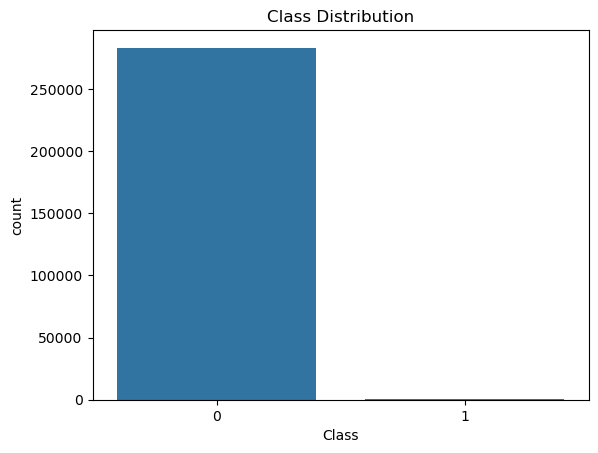

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [19]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

df['Class'].value_counts(normalize=True)

Numeric Distribution

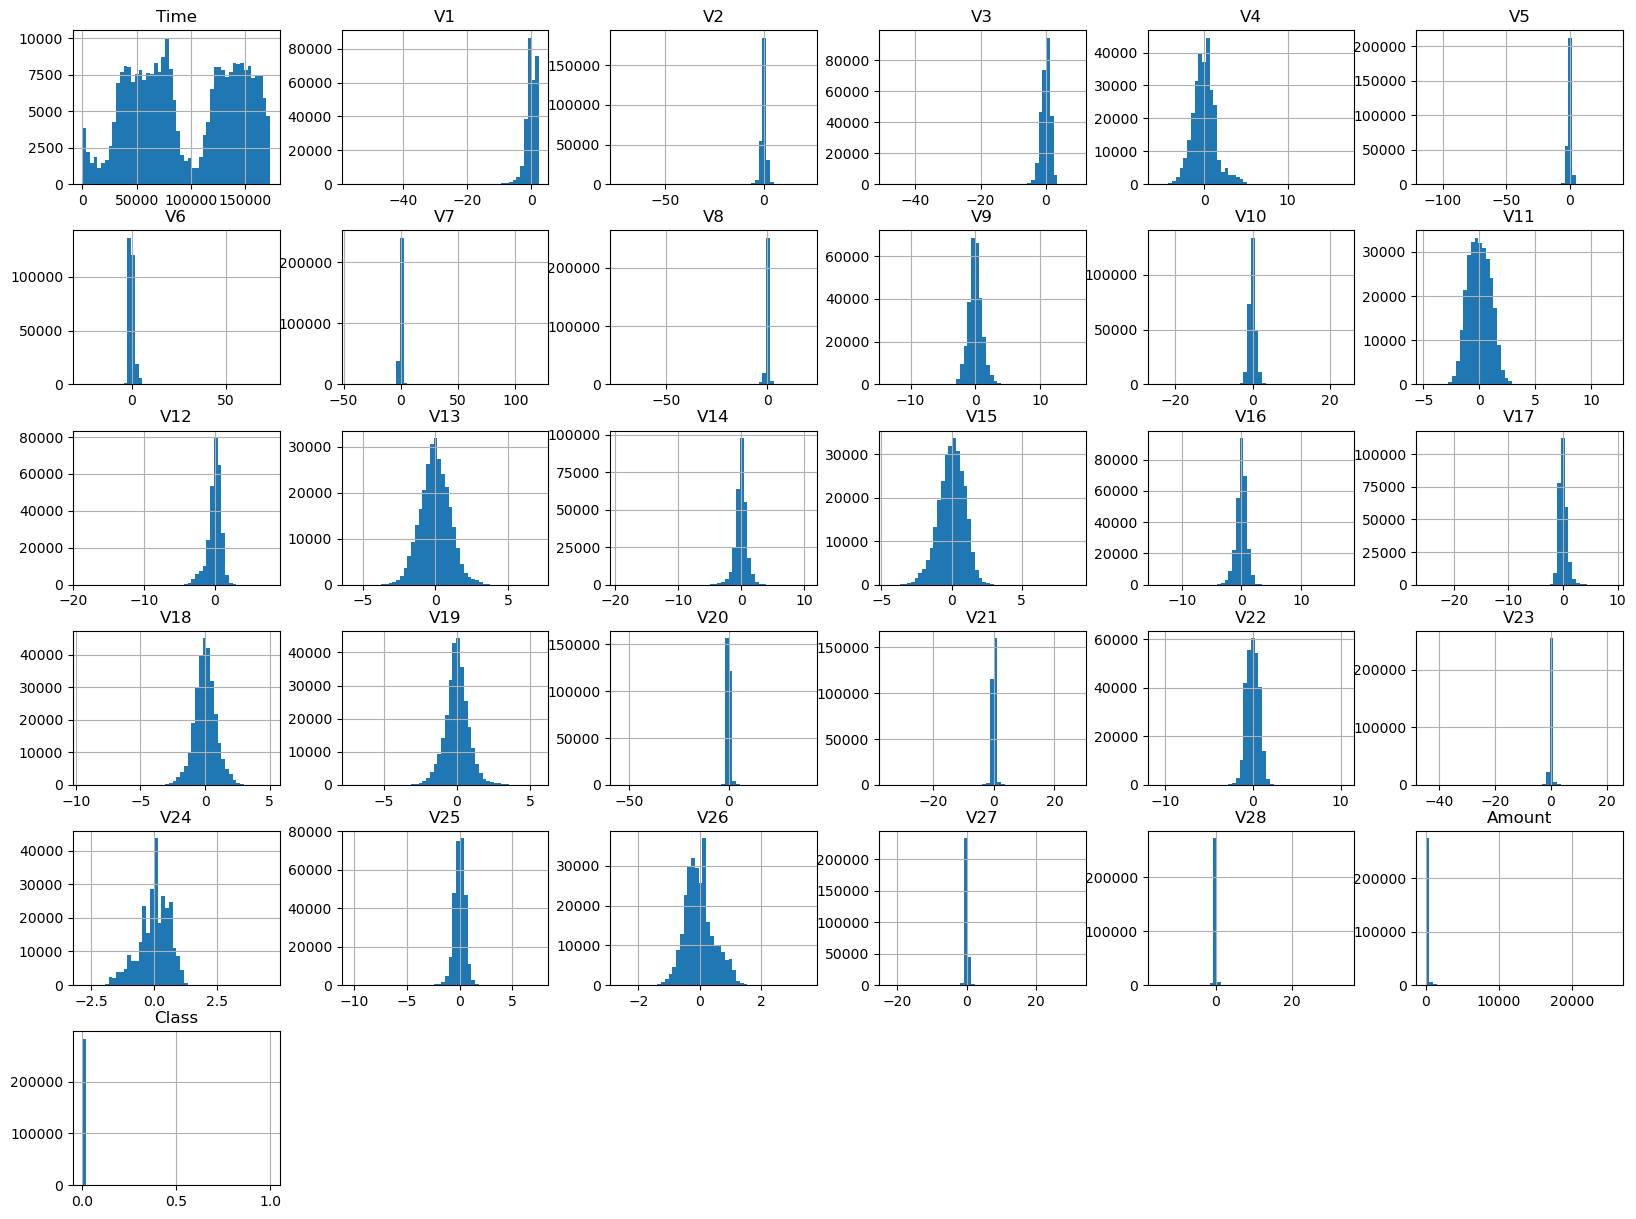

In [21]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Time Column Analysis

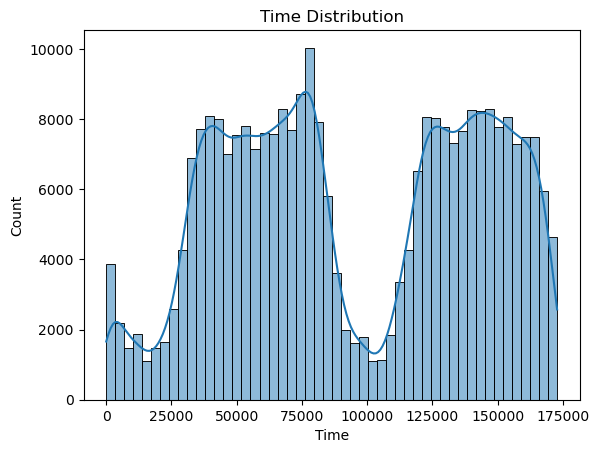

In [23]:
# Time exploration
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Time Distribution")
plt.show()

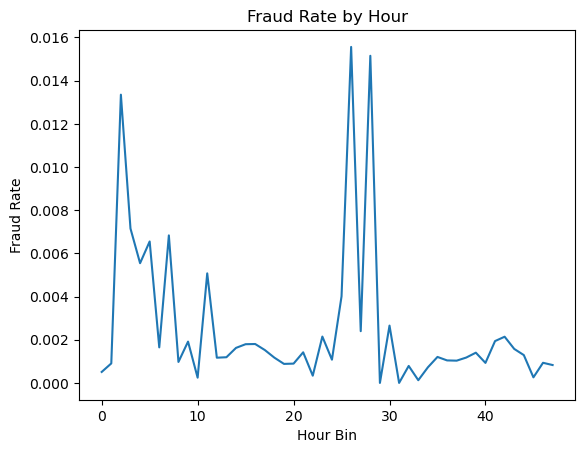

In [24]:
# Bin time into hour bins to inspect fraud rate by approximate hour since dataset start
df['time_bin_hr'] = (df['Time'] // 3600).astype(int)
time_fraud = df.groupby('time_bin_hr')['Class'].sum()
time_total = df.groupby('time_bin_hr')['Class'].count()
fraud_rate = (time_fraud / time_total).fillna(0)

plt.plot(fraud_rate.index, fraud_rate.values)
plt.title("Fraud Rate by Hour")
plt.xlabel("Hour Bin")
plt.ylabel("Fraud Rate")
plt.show()

### PCA NOTE
V1–V28 are PCA-transformed components.  
PCA removes multicollinearity, so correlation heatmap or VIF on these features is not meaningful.  
Hence, feature correlation removal is not applied.

##### Boxplot to check Outliers

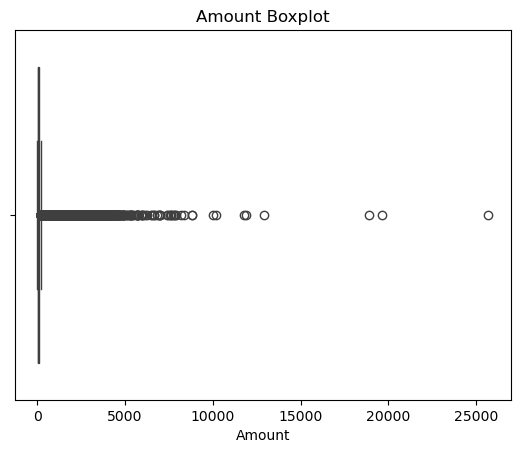

In [27]:
sns.boxplot(x= df['Amount'])
plt.title("Amount Boxplot")
plt.show()

##### Histogram to check Skew

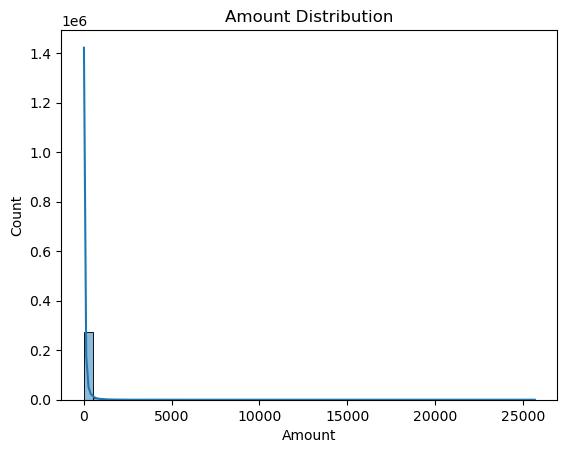

In [29]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Amount Distribution")
plt.show()

##### Feature Engineering

##### Handle Outliers

In [32]:
# Apply log transformation
df['Amount_log'] = np.log1p(df['Amount'])

##### Histogram of log-transformed Amount

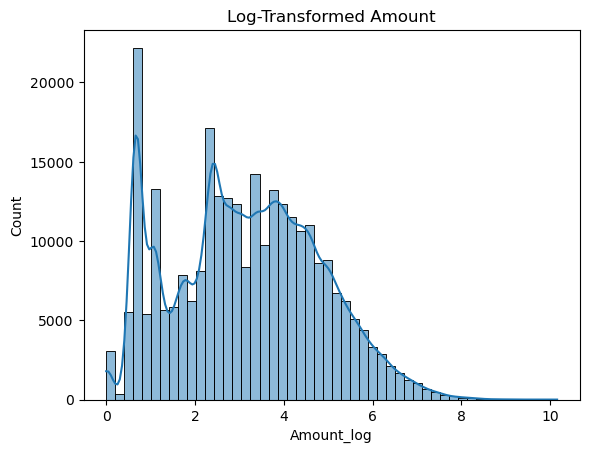

In [34]:
sns.histplot(df['Amount_log'], bins=50, kde=True)
plt.title("Log-Transformed Amount")
plt.show()

## Train Test Split

In [36]:
x = df.drop(columns=['Class', 'time_bin_hr'])
y = df['Class']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.3, stratify= y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(198608, 31)
(85118, 31)
(198608,)
(85118,)


In [38]:
print("y_train distribution:\n", y_train.value_counts())

y_train distribution:
 Class
0    198277
1       331
Name: count, dtype: int64


##### Fetures Scaling 
Fit on train to avoid leakage

In [40]:
# Fit scaler on TRAIN ONLY
scaler = StandardScaler()
scaler.fit(x_train)

# Transform both sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [41]:
# convert into DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x.columns, index= x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x.columns, index= x_test.index)

##### Check Imbalance 

In [43]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [44]:
fraud_pct = df['Class'].mean() * 100
print(f"Fraud Percentage: {fraud_pct:.4f}%")

Fraud Percentage: 0.1667%


##### Handle Imbalance data

In [46]:
smote = SMOTE(random_state=42)

In [47]:
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

In [48]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0    198277
1       331
Name: count, dtype: int64
After SMOTE: Class
0    198277
1    198277
Name: count, dtype: int64


## Logistic Regression

In [50]:
# Train model
log_model = LogisticRegression()
log_model.fit(x_train_res, y_train_res)

LogisticRegression()

In [51]:
# Predict on TEST data
y_pred = log_model.predict(x_test_scaled)

In [52]:
# Evaluate on TEST data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



In [53]:
# Evaluate on TEST data
cm = confusion_matrix(y_test, y_pred)
cm

array([[82523,  2453],
       [   17,   125]], dtype=int64)

Confusion Matrix 

In [55]:
cm = confusion_matrix(y_test, y_pred)
cm2= pd.DataFrame(data= cm, columns= ['Predicted: 0', 'Predicted: 1'], index= ['Actual: 0', 'Actual: 1'])   

##### Create the folder

In [57]:
import os
os.makedirs("images", exist_ok=True)

##### Save Image

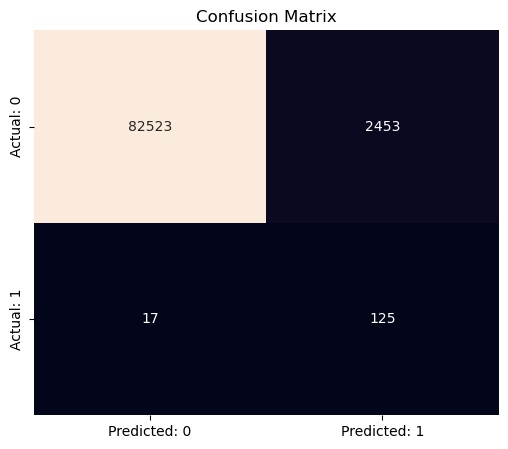

In [59]:
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, cbar=False, fmt='g')
plt.title("Confusion Matrix")

plt.savefig("images/ConfusionMatrix.png", dpi=300, bbox_inches="tight")

plt.show()

Threshold Tuning

In [61]:
# Reduce FN (missed fraud):
y_proba = log_model.predict_proba(x_test_scaled)[:, 1]
y_pred_adj = (y_proba > 0.25).astype(int)

Check Performance of Model

In [63]:
# Evaluate on TEST data
print(classification_report(y_test, y_pred_adj))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     84976
           1       0.02      0.89      0.04       142

    accuracy                           0.93     85118
   macro avg       0.51      0.91      0.50     85118
weighted avg       1.00      0.93      0.96     85118



In [64]:
# Evaluate on TEST data
print(confusion_matrix(y_test, y_pred_adj))

[[78656  6320]
 [   15   127]]


In [65]:
# Predict on training data
y_pred_train = log_model.predict(x_train_res)

In [66]:
# Evaluate on training data
print(classification_report(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    198277
           1       0.97      0.93      0.95    198277

    accuracy                           0.95    396554
   macro avg       0.95      0.95      0.95    396554
weighted avg       0.95      0.95      0.95    396554



In [67]:
# Evaluate on training data
print(confusion_matrix(y_train_res, y_pred_train))

[[192688   5589]
 [ 14688 183589]]


## Random Forest

In [69]:
rf = RandomForestClassifier(
    n_estimators=100,        
    max_depth=12,          
    max_features='sqrt',    
    random_state=42,
    n_jobs=-1,
)
rf

rf.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=12, n_jobs=-1, random_state=42)

Check Performance of Model

In [71]:
rf_y_pred = rf.predict(x_test_scaled)

In [72]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.68      0.80      0.74       142

    accuracy                           1.00     85118
   macro avg       0.84      0.90      0.87     85118
weighted avg       1.00      1.00      1.00     85118



In [73]:
print(confusion_matrix(y_test, rf_y_pred))

[[84924    52]
 [   29   113]]


In [74]:
rf_y_pred_train = rf.predict(x_train_res)

In [75]:
print(classification_report(y_train_res, rf_y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       1.00      1.00      1.00    198277

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554



In [76]:
print(confusion_matrix(y_train_res, rf_y_pred_train))

[[198164    113]
 [   625 197652]]


##### Feature Importance (RF)

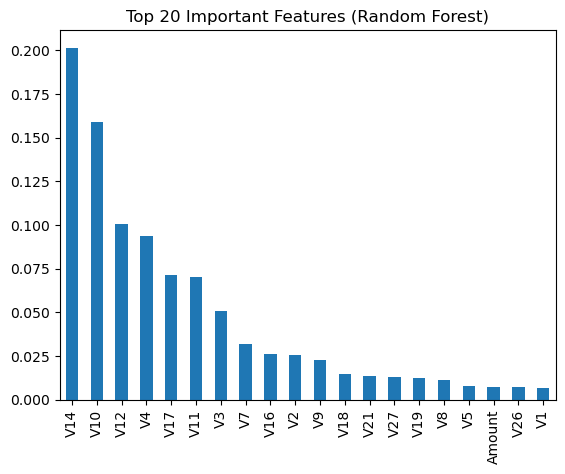

In [78]:
importances = pd.Series(rf.feature_importances_, index= x.columns)
importances.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Important Features (Random Forest)")
plt.show()

## AUC and ROC Curve

Probability Prediction

In [81]:
# Get probabilities for the positive class (fraud)
y_proba_rf = rf.predict_proba(x_test_scaled)[:, 1]

AUC Calculation

In [83]:
# Calculate AUC Score
auc = roc_auc_score(y_test, y_proba_rf)
print("AUC Score:", auc)

AUC Score: 0.9755471967561345


ROC Curve Plot

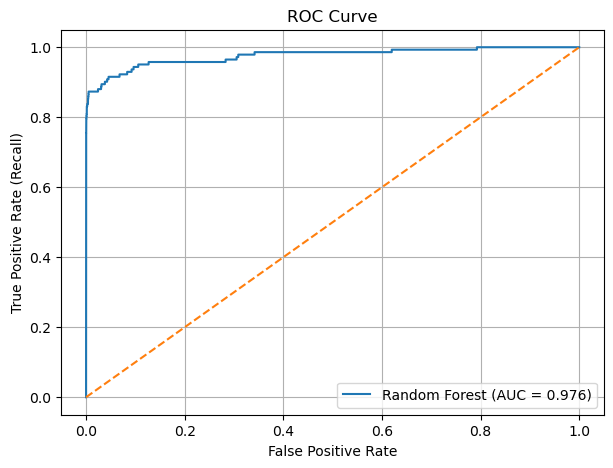

In [85]:
# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.3f})".format(auc))
plt.plot([0,1], [0,1], linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)

# Save Image
plt.savefig("images/ROCcurve.png", dpi=300, bbox_inches="tight")

plt.show()

## PRECISION–RECALL (PR) CURVE

Average Precision Score: 0.7955236685323381


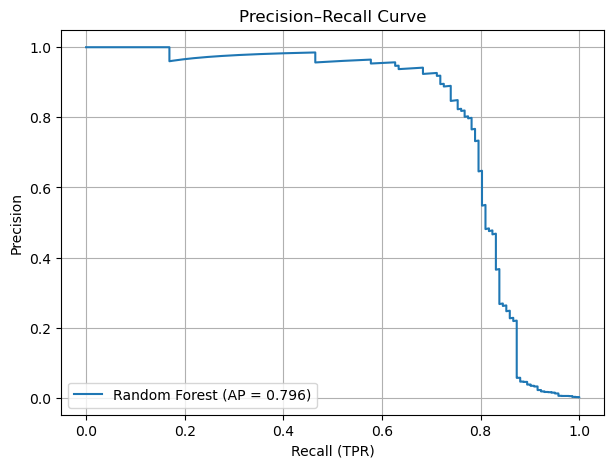

In [87]:
# Precision-Recall values 
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Average precision score (AUC for PR curve)
ap = average_precision_score(y_test, y_proba_rf)
print("Average Precision Score:", ap)

# Plot PR Curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label="Random Forest (AP = {:.3f})".format(ap))
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)

# Save Image
plt.savefig("images/PRcurve.png", dpi=300, bbox_inches="tight")

plt.show()

#### Model Comparison Table

In [89]:
models = {"Logistic Regression": log_model, "Random Forest": rf}
results = []

for name, model in models.items():
    pred = model.predict(x_test_scaled)
    proba = model.predict_proba(x_test_scaled)[:,1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1 Score": f1_score(y_test, pred),
        "ROC-AUC": roc_auc_score(y_test, proba)
    })

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.970981,0.048487,0.880282,0.091912,0.962664
1,Random Forest,0.999048,0.684848,0.795775,0.736156,0.975547


## 📌 Model Selection Summary

Two models were evaluated — Logistic Regression and Random Forest.

Random Forest clearly performed the best:

- **Highest Precision (0.68)** → fewer false alarms  
- **High Recall (0.79)** → detects most fraud cases  
- **Best F1-Score (0.73)** → balanced performance  
- **Highest ROC–AUC (0.9755)** → strongest fraud-vs-non-fraud separation  

### ✔️ Final Model: **Random Forest**

Random Forest is selected as the final model because it provides the best balance between detecting fraud and minimizing false positives, making it ideal for real-world fraud detection.

##### Final Prediction on Unseen Test Samples

In [92]:
sample = x_test.iloc[:5]
sample_scaled = scaler.transform(sample)

preds = rf.predict(sample_scaled)
probs = rf.predict_proba(sample_scaled)[:,1]

out = sample.copy()
out["Prediction"] = preds
out["Fraud_Probability"] = probs

out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Amount_log,Prediction,Fraud_Probability
139330,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,...,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,19.45,3.017983,0,0.008026
86361,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,...,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,31.35,3.476614,0,0.013829
94117,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,...,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,0.89,0.636577,0,0.010009
123803,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,...,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,83.50,4.436752,0,0.008062
126884,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,...,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,250.00,5.525453,0,0.008853


Final Prediction Preview:
This table shows the model's predictions and fraud probabilities on 5 unseen test transactions.

# 📌 Business Insights

### 1. Fraud is extremely rare
Only **0.17%** of all transactions are fraudulent.  
This level of imbalance makes traditional accuracy useless as a metric and highlights the need for recall-focused models.

### 2. Fraud occurs in specific time windows
Time-based analysis shows that fraud rates vary across different hours of the day.  
This indicates potential patterns in attacker behavior and can help in building time-aware monitoring systems.

### 3. Transaction amount is skewed
The `Amount` feature is highly skewed, and large transaction amounts show different risk patterns.  
Using log transformation improves model stability and helps detect fraud more effectively.

### 4. PCA features (V1–V28) carry strong fraud signals
Although original customer/transaction features are hidden for privacy, the PCA components still clearly separate fraud from non-fraud cases.  
This means machine learning models can still learn meaningful patterns from anonymized data.

### 5. False negatives are costly
Missing a fraud (False Negative) leads to direct financial losses.  
Models must prioritize **high recall**—detecting as many fraud cases as possible—even at the cost of slightly more false positives.

### 6. Random Forest captures complex fraud patterns
Fraud cases do not follow linear boundaries.  
Random Forest, being non-linear, captures these hidden interactions better than Logistic Regression, giving superior raud detection results.

# ✅ Conclusion- The dataset showed severe class imbalance (only **0.17%** fraud), which was effectively handled using **SMOTE** on the training set only.  
- All preprocessing steps (outlier handling, scaling, SMOTE) were carefully applied on the **training data** to avoid any form of data leakage.  
- **Random Forest** emerged as the best-performing model, providing the best balance between precision and recall.  
- The model achieved strong **ROC–AUC** and **Precision–Recall AUC**, which are the correct evaluation metrics for imbalanced classification problems.  
- Log-transforming the transaction amount improved model stability and provided clearer feature importance insights.  
- PCA-transformed features were handled effectively without unnecessary multicollinearity checks.  
- The final model significantly reduces **false negatives**, which is the primary business requirement in fraud detection.  

## Model Export 

Create folder

In [98]:
import os
os.makedirs("model", exist_ok=True)

Save model & scaler

In [100]:
import joblib
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(rf, "model/random_forest_model.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


Verify saved files

In [102]:
import os
os.listdir("model")

['.ipynb_checkpoints', 'random_forest_model.pkl', 'scaler.pkl']

Sanity Test: Load and Predict

In [104]:
import joblib

scaler_loaded = joblib.load("model/scaler.pkl")
rf_loaded     = joblib.load("model/random_forest_model.pkl")

# quick prediction test
sample = x_test.iloc[:2]
sample_scaled = scaler_loaded.transform(sample)
preds = rf_loaded.predict(sample_scaled)

print("Predictions:", preds)
print("Loaded scaler:", type(scaler_loaded))
print("Loaded model:", type(rf_loaded))

Predictions: [0 0]
Loaded scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Loaded model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
